## Molecule Tools

### Get a fragment and add H atoms

In [13]:
import scm.plams as plams
import matplotlib.pyplot as plt
import numpy as np

# Note this example requires AMS2025+ to run

<AxesSubplot: >

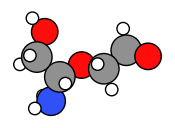

In [2]:
mol = plams.from_smiles("NC(CO)OCC=O")
plams.plot_molecule(mol)

Get a fragment from the initial molecule

<AxesSubplot: >

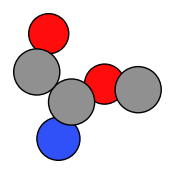

In [3]:
fragment = mol.get_fragment([0, 1, 2, 3, 4, 5])
plams.plot_molecule(fragment)

Add H atoms to fill the missing bonds

In [4]:
print(fragment)

  Atoms: 
    1         N      -0.999632      -1.773633      -0.855822
    2         C      -0.566787      -0.562926      -0.166284
    3         C      -1.713954       0.428151      -0.121553
    4         O      -1.320072       1.688451      -0.583466
    5         O       0.520094       0.027968      -0.827584
    6         C       1.627225      -0.155812      -0.009368
  Bonds: 
   (1)--1.0--(2)
   (2)--1.0--(3)
   (3)--1.0--(4)
   (2)--1.0--(5)
   (5)--1.0--(6)



In [5]:
fragment_h = fragment.add_hatoms()

<AxesSubplot: >

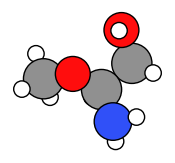

In [6]:
plams.plot_molecule(fragment_h, rotation=("0x,180y,0z"))

Text(0, 0.5, 'count')

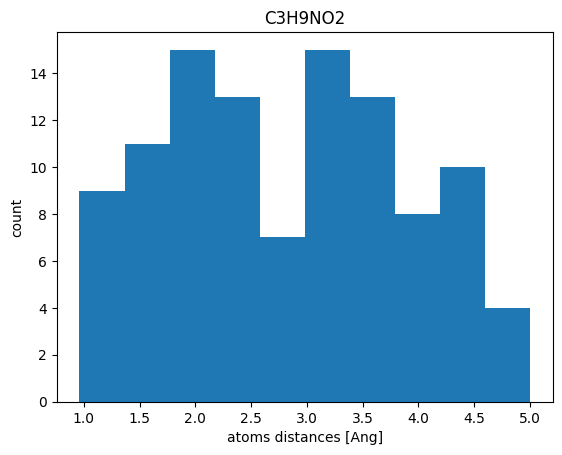

In [7]:
matrix = plams.toASE(fragment_h).get_all_distances()
mask = np.triu(np.ones_like(matrix, dtype=bool), k=1)
plt.hist(matrix[mask])
plt.title(fragment_h.get_formula())
plt.xlabel("atoms distances [Ang]")
plt.ylabel("count")

### Visualize molecule

With ase tools

<AxesSubplot: >

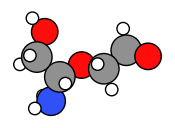

In [8]:
import scm.plams as plams

mol = plams.from_smiles("NC(CO)OCC=O")
plams.plot_molecule(mol)

With rdkit you can get the PIL image

In [9]:
molecules = [mol, plams.from_smiles("NC")]

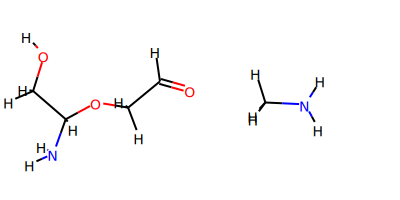

In [10]:
img = plams.plot_grid_molecules(molecules, molsPerRow=2)
img

Or you can get the plt.Axes, but at lower quality:

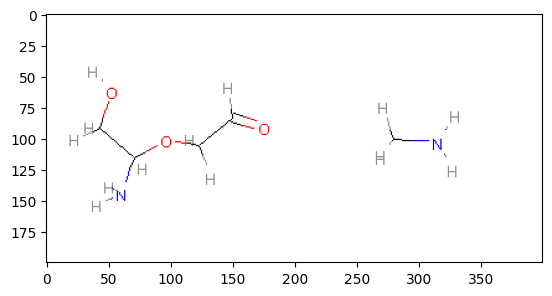

In [11]:
import matplotlib.pyplot as plt

plt.Axes
fig, ax = plt.subplots()
ax = plams.plot_grid_molecules(molecules, molsPerRow=2, ax=ax)
fig.savefig("plot_grid_molecules.png")

You can save the image as svg by doing so:

In [12]:
img = plams.plot_grid_molecules(molecules, molsPerRow=2, save_svg_path="mols.svg")